In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import cv2
import tensorflow as tf
from tensorflow import keras
from keras import layers
from functools import partial

import warnings
warnings.filterwarnings('ignore')
AUTO = tf.data.experimental.AUTOTUNE

In [7]:
from zipfile import ZipFile 
data_path = 'dog-breed-identification.zip'

with ZipFile(data_path, 'r') as zip: 
    zip.extractall() 
    print('The data set has been extracted.') 


The data set has been extracted.


In [8]:
df = pd.read_csv('labels.csv')
df.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [9]:
df.shape

(10222, 2)

In [10]:
df['breed'].nunique()

120

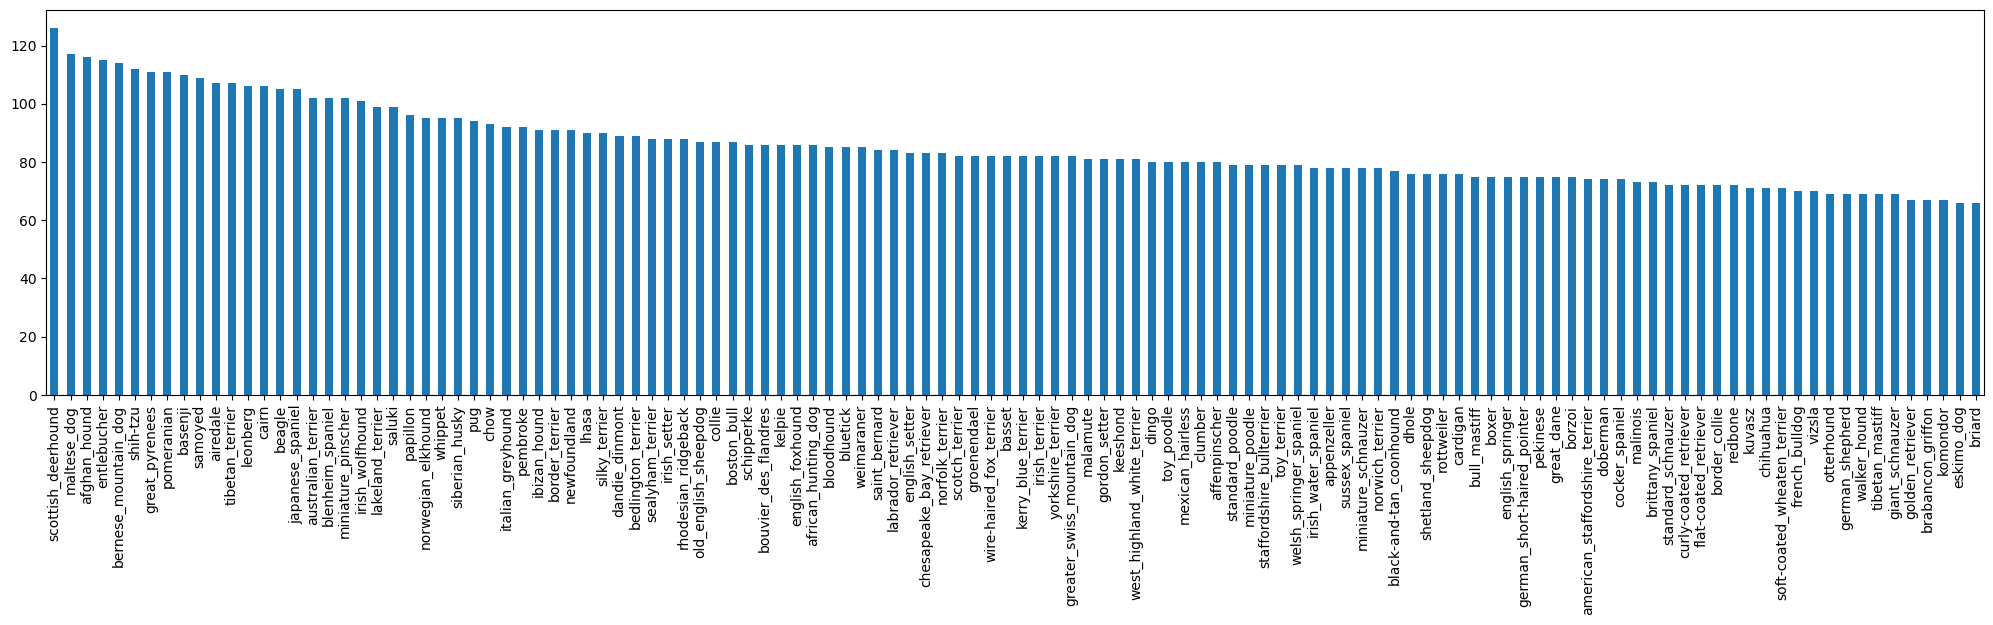

In [11]:
plt.figure(figsize=(25, 5))
df['breed'].value_counts().plot.bar()
#plt.axis('off')
plt.show()

In [12]:
df['filepath'] = 'train/' + df['id'] + '.jpg'
df.head()

,id,breed,filepath
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull,train/000bec180eb18c7604dcecc8fe0dba07.jpg
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo,train/001513dfcb2ffafc82cccf4d8bbaba97.jpg
2,001cdf01b096e06d78e9e5112d419397,pekinese,train/001cdf01b096e06d78e9e5112d419397.jpg
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick,train/00214f311d5d2247d5dfe4fe24b2303d.jpg
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever,train/0021f9ceb3235effd7fcde7f7538ed62.jpg


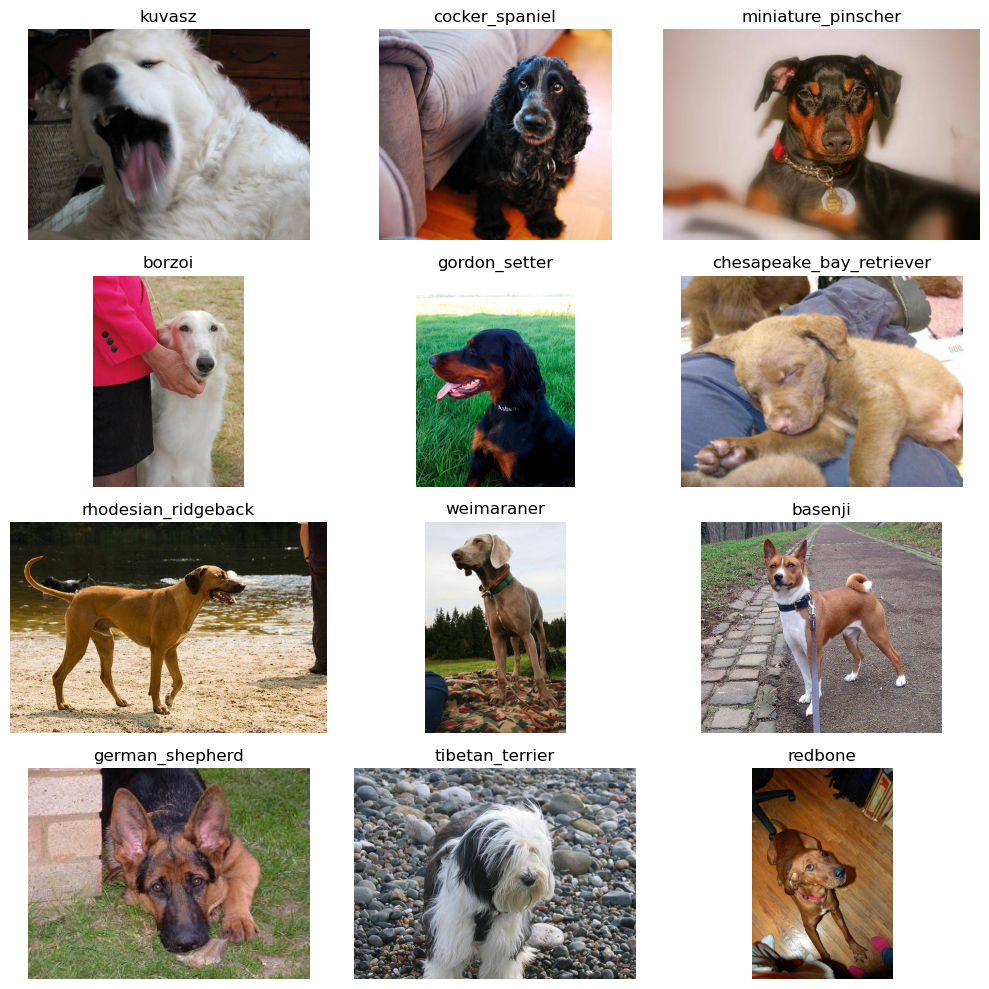

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

# Assuming df is your DataFrame containing image file paths and breed information

# Create a figure and subplots with a specified figure size
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(10, 10))

for i, ax in enumerate(axes.flat):
    # Selecting a random image index from the dataframe.
    k = np.random.randint(0, len(df))
    img = cv2.imread(df.loc[k, 'filepath'])
    
    # Display the image in the current subplot
    ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    ax.set_title(df.loc[k, 'breed'])
    ax.axis('off')

# Show the entire plot
plt.tight_layout()
plt.show()


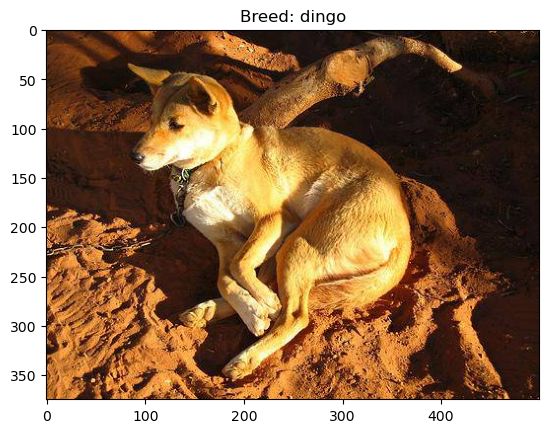

In [14]:
import cv2
import matplotlib.pyplot as plt
import pandas as pd

# Load the DataFrame containing image file names and breeds
df = pd.read_csv('labels.csv')  # Assuming your DataFrame is saved in a CSV file

# Load the image using OpenCV
img = cv2.imread('train/001513dfcb2ffafc82cccf4d8bbaba97.jpg')

# Check if the image is properly loaded
if img is None:
    print("Error: Unable to load the image.")
else:
    # Convert BGR to RGB color format
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Extract the file name without extension
    file_name = '001513dfcb2ffafc82cccf4d8bbaba97'  # You need to extract this from your file path
    
    # Look up the breed from DataFrame based on the file name
    breed_row = df[df['id'] == file_name]  # Adjust column name based on your DataFrame
    if not breed_row.empty:
        breed = breed_row['breed'].values[0]  # Adjust column name based on your DataFrame
    else:
        breed = "Unknown"
        print(f"No breed information found for file: {file_name}")

    # Display the image along with the breed
    plt.imshow(img_rgb)
    plt.title(f'Breed: {breed}')
    plt.show()

Enter the file name (without extension): 000bec180eb18c7604dcecc8fe0dba07


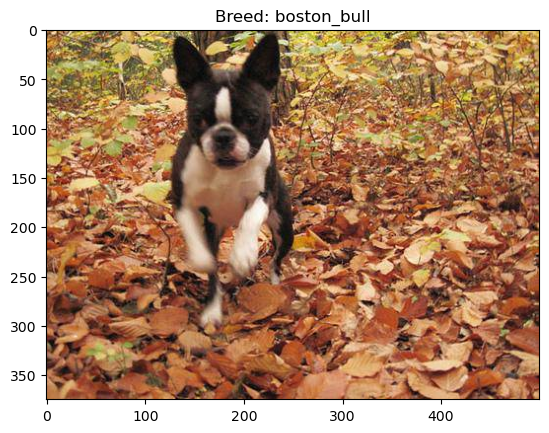

In [22]:
file_name = input("Enter the file name (without extension): ")

breed_row = df[df['id'] == file_name]
if not breed_row.empty:
    breed = breed_row['breed'].values[0]
else:
    breed = "Unknown"
    print(f"No breed information found for file: {file_name}")

img = cv2.imread(f'train/{file_name}.jpg')

if img is None:
    print("Error: Unable to load the image.")
else:
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

   
    plt.imshow(img_rgb)
    plt.title(f'Breed: {breed}')
    plt.show()


In [83]:
features = df['id']  # Assuming the column containing file names is named 'file_name'
target = df['breed']  # Assuming the column containing breed labels is named 'breed'
X_train, X_val, Y_train, Y_val = train_test_split(features, target, test_size=0.15, random_state=10)

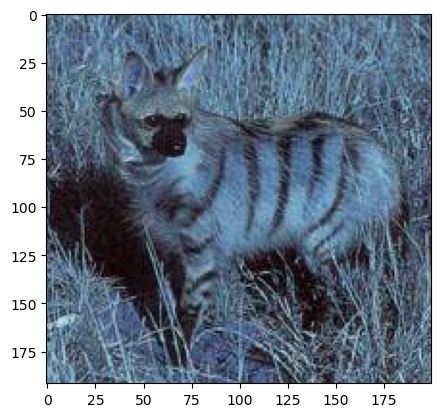

In [17]:
img = cv2.imread('train/00792e341f3c6eb33663e415d0715370.jpg') 
plt.imshow(img) 
plt.show()


In [24]:
import albumentations as A
import cv2

ModuleNotFoundError: No module named 'albumentations'

In [29]:
import albumentations as A 

transforms_train = A.Compose([ A.VerticalFlip(p=0.2), A.HorizontalFlip(p=0.7), A.CoarseDropout(p=0.5), A.RandomGamma(p=0.5), A.RandomBrightnessContrast(p=1)]) 


ModuleNotFoundError: No module named 'albumentations'

In [73]:
def aug_fn(img): 
    aug_data = transforms_train(image=img) 
    aug_img = aug_data['image'] 

    return aug_img 


@tf.function 
def process_data(img, label): 
    aug_img = tf.numpy_function(aug_fn, [img],Tout=tf.float32) 

    return aug_img, label 


def decode_image(filepath, label=None): 

    img = tf.io.read_file(filepath) 
    img = tf.image.decode_jpeg(img) 
    img = tf.image.resize(img, [128, 128]) 
    img = tf.cast(img, tf.float32) / 255.0

    if label == None: 
        return img, tf.one_hot(indices=label, depth=120, dtype=tf.float32) 


In [72]:
def aug_fn(img): 
	aug_data = transforms_train(image=img) 
	aug_img = aug_data['image'] 

	return aug_img 


@tf.function 
def process_data(img, label): 
    aug_img = tf.numpy_function(aug_fn,[img],Tout=tf.float32) 
    return img,label 


def decode_image(filepath, label=None): 

	img = tf.io.read_file(filepath) 
	img = tf.image.decode_jpeg(img) 
	img = tf.image.resize(img, [128, 128]) 
	img = tf.cast(img, tf.float32) / 255.0

	if label == None: 
		return img 

	return img, tf.one_hot(indices=label, 
						depth=120, 
						dtype=tf.float32) 


In [76]:
def decode_image(filepath, label=None):
    img = tf.io.read_file(filepath)
    img = tf.image.decode_jpeg(img)
    img = tf.image.resize(img, [128, 128])
    img = tf.cast(img, tf.float32) / 255.0

    if label is None:
        return img

    # Convert label to integer type before passing to tf.one_hot()
    label = tf.cast(label, tf.int32)

    return img, tf.one_hot(indices=label, depth=120, dtype=tf.float32), (tf.TensorShape([128, 128, 3]), tf.TensorShape([120]))


In [48]:
from tensorflow.keras.applications.inception_v3 import InceptionV3 

pre_trained_model = InceptionV3( 
	input_shape=(128, 128, 3), 
	weights='imagenet', 
	include_top=False
) 


In [49]:
len(pre_trained_model.layers)

311

In [59]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau 

class myCallback(tf.keras.callbacks.Callback): 
	def on_epoch_end(self, epoch, logs={}): 
		if logs.get('val_auc') > 0.99: 
			print('\n Validation accuracy has reached upto 90%\ so, stopping further training.') 
			self.model.stop_training = True

es = EarlyStopping(patience=3, 
				monitor='val_auc', 
				restore_best_weights=True) 

lr = ReduceLROnPlateau(monitor='val_loss', 
					patience=2, 
					factor=0.5, 
					verbose=1) 

